# Bike Sharing Assignment

In [1]:
#We are going to build a multiple linear regression Model for the prediction of demand for shared bikes  

In [2]:
#Import the necesssary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Scaling Purpose , we are going to use MinMax
from sklearn.preprocessing import MinMaxScaler
# Extra
import warnings
warnings.filterwarnings(action='ignore')

**Reading the dataset**

In [3]:
bs= pd.read_csv('Bike_Sharing.csv')  #Reading the data

In [4]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Data Dictionary**
    
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
#Check Count of Unique values for the dataset
bs.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [6]:
#Checking unique values for categorical columns
print('Distinct Seasons')
print(bs['season'].unique())

print('Distinct month')
print(bs['mnth'].unique())

print('Distinct Year')
print(bs['yr'].unique())

print('Distinct weekday')
print(bs['weekday'].unique())

print('Distinct weathersit')
print(bs['weathersit'].unique())

print('Distinct workingday')
print(bs['workingday'].unique())

print('Distinct holiday')
print(bs['holiday'].unique())



Distinct Seasons
[1 2 3 4]
Distinct month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Distinct Year
[0 1]
Distinct weekday
[1 2 3 4 5 6 0]
Distinct weathersit
[2 1 3]
Distinct workingday
[1 0]
Distinct holiday
[0 1]


In [7]:
#Check total rows and Columns in the dataset
bs.shape

(730, 16)

In [8]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#We can see there are no Nulls in the dataset so we do not need to check for nUll values

In [10]:
#Get statiustical summary of numerical values
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Separate the categorical and numerical columns

cat_col=['season','yr','holiday','mnth','weekday','workingday','weathersit']

num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']

other_col =['instant','dteday']


**Perfrom EDA**

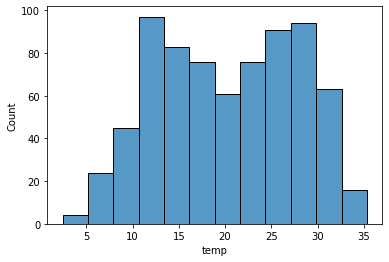

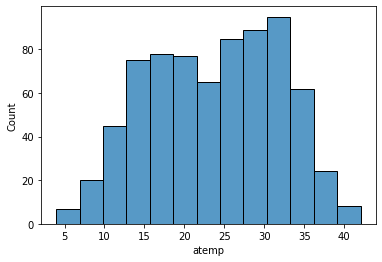

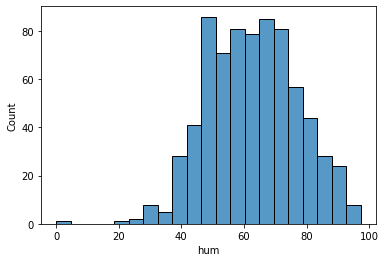

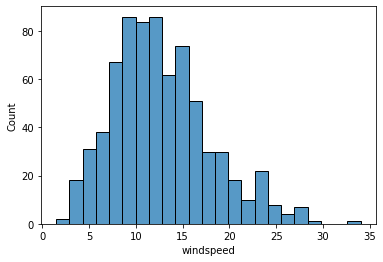

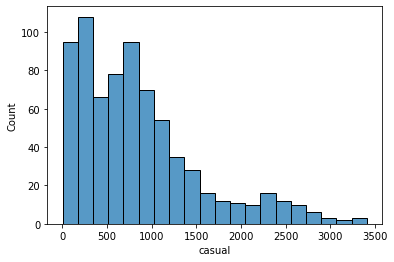

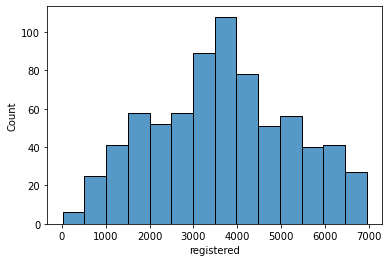

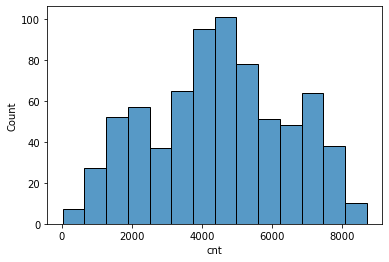

In [13]:
for i in num_cols:
    sns.histplot(x=bs[i])
    plt.show()

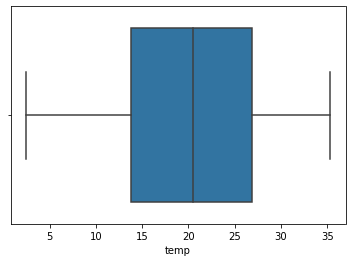

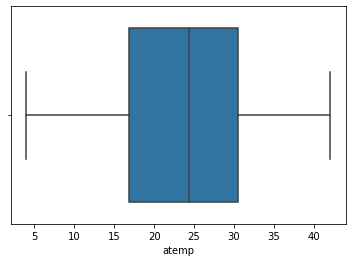

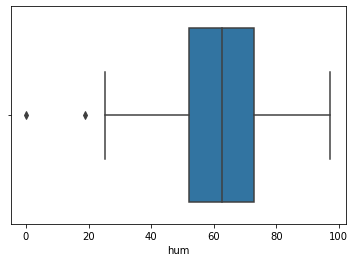

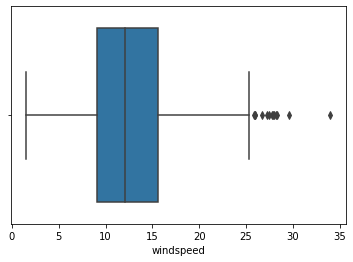

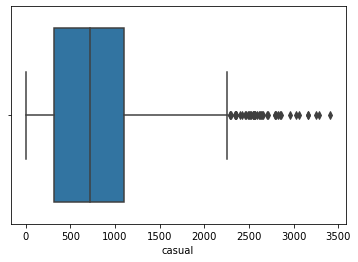

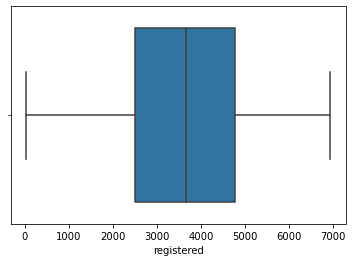

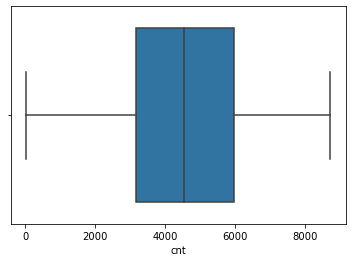

In [14]:
for i in num_cols:
    sns.boxplot(x=bs[i])
    plt.show()

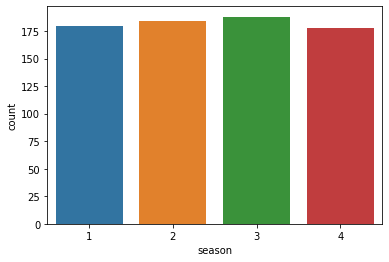

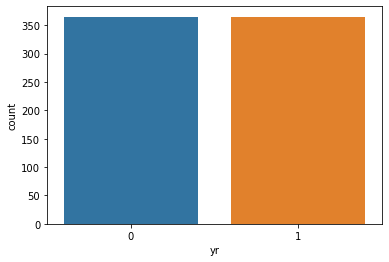

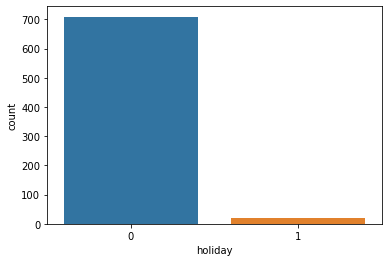

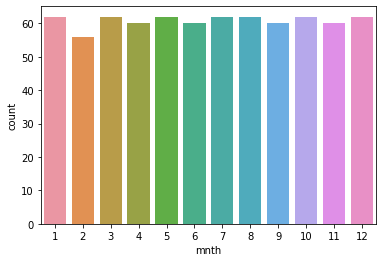

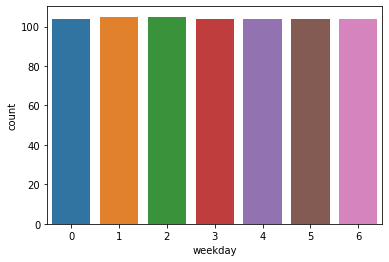

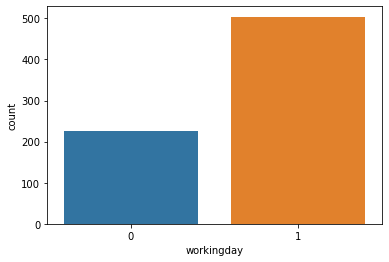

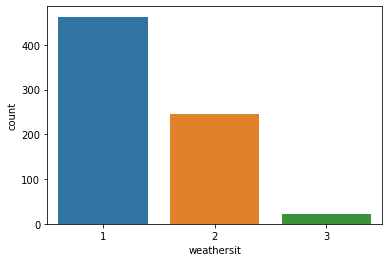

In [15]:
for i in cat_col:
    sns.countplot(x=bs[i])
    plt.show()
    

Observations from the count Plot :-

--We ca see a very less count of Holidays. 

--Count of working day nearly double than the count of non working day, suggesting the bike sharing goes on more during working days.

--Most bike usage is on waethersit 1 ie Clear, Few clouds, Partly cloudy, Partly cloudy.



**Bivariate Analysis**

We do Bivariate analysis to explore relationship between two variables. We can perform Bivariate in numerical vs numerical(Scatter plots, correlation coeficients) , 
categorical vs numerical(Box Plot) and categorical vs categorical (Cross Tabulation. staked bar plots)

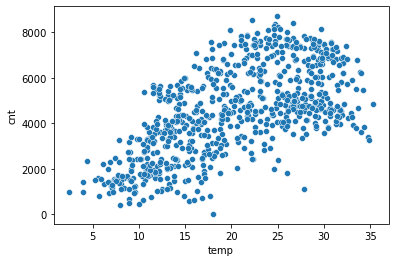

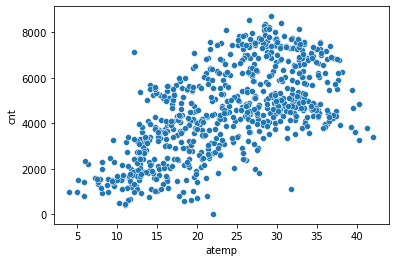

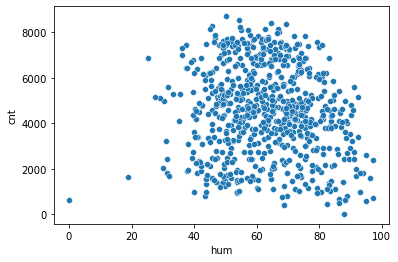

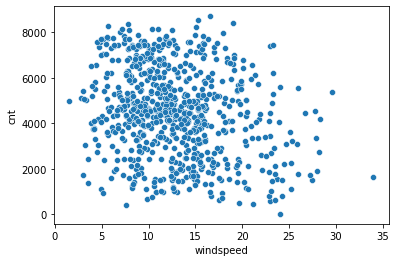

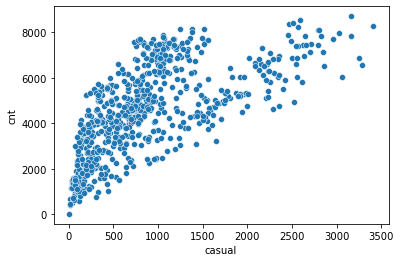

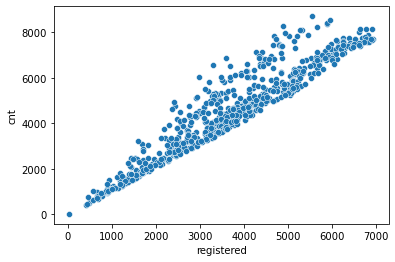

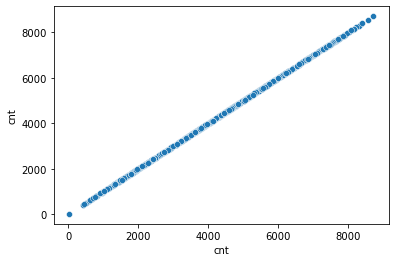

In [16]:
#Numerical vs Numerical 

for i in num_cols:
    sns.scatterplot(x=bs[i], y=bs['cnt'])
    plt.show()

In [17]:
#We can observer that with inncrease in temperature , there is an increase in bike demand

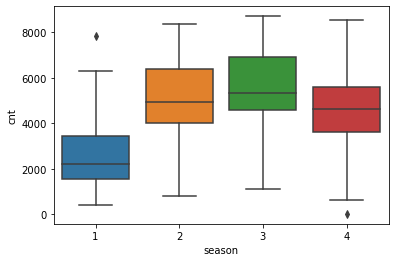

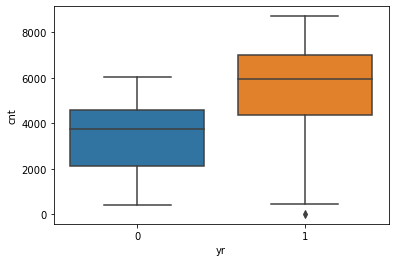

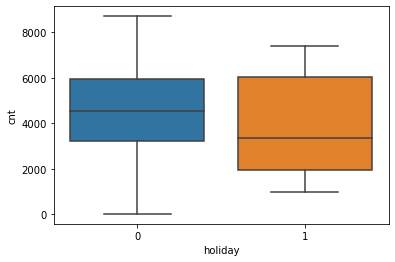

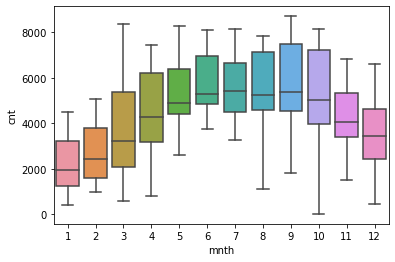

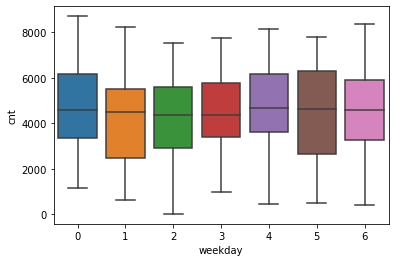

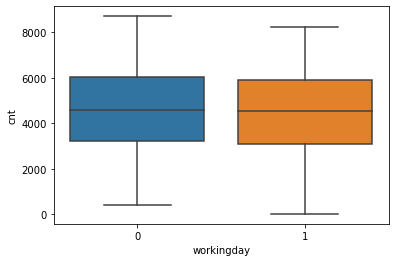

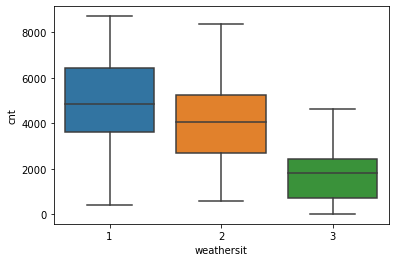

In [18]:
#Numerical vs Categorical

for i in cat_col:
    sns.boxplot(x=bs[i], y=bs['cnt'])
    plt.show()

**Multivariate Analysis**

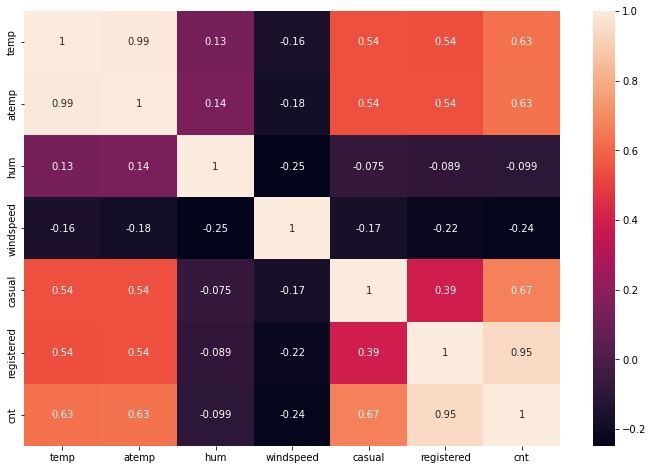

In [19]:
#Heatmap

#Correlation is between -1 to 1 , where value 0 represents no relationship , correlation between 0 and 1 is direct relationship 
# and between -1 to 0  shows inverse relationship

plt.figure(figsize=(12,8))
sns.heatmap(bs[num_cols].corr(),annot=True)  #Annot is used to show values 
plt.show()

#Observations 

1. Season 3(Autumn/Fall) has highest count , followed by summer season.
2. In 2019 , count is higher
3. It is observed the count is higher during the months 6,7,8,9 and 10.
4. Most count is during clear weather
5. No significant outliers in the data
6. Temp and atemp ares similar values and won't contribute if taken independently as a variable for the model
7. Temp has positve and significant relationship with cnt

In [20]:
bs=bs.drop(columns=['atemp'])

In [21]:
#Visualize all the data columns, and see if some of the columns can justify the variance in cnt
#sns.pairplot(bs)
#plt.show()

In [22]:
#Looking at the above visualization , we can conclude to go ahead with linear regression model 

**Preparing the data for Modelling**

In [23]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


We will drop the columns instant, dteday , casual and registered


Instant is index column, and will not help in predicting cnt value.

dteday needs to be transformed, but since there are weekday, mnth and yr column already, we do not need it.

Both casual and registred are components of cnt , highly correlated with cnt. This could lead to overfitting.

In [24]:
#Columns to drop
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bsm=bs.drop(columns=columns_to_drop)

In [25]:
bsm.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


Data Dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [26]:
#Mapping the categorical values in numerical type to actual description

In [27]:
# Define the mapping 

weather_map ={
    1: 'clear',
    2: 'cloudy',
    3: 'lightrain'
}

bsm['weathersit']= bsm['weathersit'].map(weather_map)

In [28]:
#(1:spring, 2:summer, 3:fall, 4:winter)

season_map ={
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'    
}

bsm['season']=bsm['season'].map(season_map)

In [29]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

bsm['mnth']= bsm['mnth'].map(month_map)

In [30]:
weekday_map = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}

bsm['weekday']= bsm['weekday'].map(weekday_map)

In [31]:
bsm.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


## Pre-processing Steps

### Dummy Variable Creation (One Hot Encoding)

In [32]:
#weathersit- In the data set we just have 'cloudy', 'clear', 'lightrain'
dum1=pd.get_dummies(bsm['weathersit'],drop_first=True,dtype=int)

In [33]:
dum2=pd.get_dummies(bsm['season'],drop_first=True,dtype=int)#For season 
dum3=pd.get_dummies(bsm['mnth'],drop_first=True,dtype=int)# For the months
dum4=pd.get_dummies(bsm['weekday'],drop_first=True,dtype=int)# for the weekdays 


In [34]:
bsm=pd.concat([bsm,dum1],axis=1)

In [35]:
bsm=pd.concat([bsm,dum2],axis=1)

In [36]:
bsm=pd.concat([bsm,dum3],axis=1)

In [37]:
bsm=pd.concat([bsm,dum4],axis=1)

In [38]:
bsm.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,1,cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [39]:
columns_to_drop1 = ['weathersit', 'season', 'mnth', 'weekday']
bsm=bsm.drop(columns=columns_to_drop1)

In [40]:
bsm.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy,lightrain,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bsm1 = bsm.copy()
bsm2 = bsm.copy()

**Train test Split**

In [42]:
X=bsm.drop(['cnt'],axis=1)
y=bsm['cnt']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [44]:
X_train.head()
print(X_train.shape)
print(X_test.shape)


(584, 28)
(146, 28)


**Scaling**

In [45]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

In [46]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [47]:
num1_cols = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[num1_cols] = scaler.fit_transform(X_train[num1_cols])
X_test[num1_cols] = scaler.transform(X_test[num1_cols])

In [48]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [49]:
X_train_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cloudy,lightrain,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
367,1,0,1,0.113228,0.454701,0.695175,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
705,1,0,0,0.326094,0.787463,0.189819,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
379,1,0,1,0.133996,0.431945,0.449210,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


**Feature Selection**


In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

In [52]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False])

In [53]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cloudy', 'lightrain',
       'spring', 'summer', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')


In [54]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

**Modelling**

In [55]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [56]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          9.71e-222
Time:                        22:43:42   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2787.0219    296.248      9.408      0.000    2205.146    3368.898
yr          1978.1382     64.941     30.460      0.000    1850.584    2105.693
holiday     -810.8373    198.311     -4.089      0.000   -1200.350    -421.324
temp        4209.7791    298.541     14.101      0.000    3623.399    4796.159
hum        -1363.7610    310.000     -4.399      0.000   -1972.647    -754.875
windspeed  -1583.5349    208.189     -7.606      0.000   -1992.448   -1174.621
cloudy      -474.4607     84.948     -5.585      0.000    -641.312    -307.610
lightrain  -2182.0145    218.859     -9.970      0.000   -2611.887   -1752.142
spring      -613.9275    170.641     -3.598      0.000    -949.091    -278.764
summer       351.5191    122.555      2.868      0.004     110.804     592.234
winter       948.9590    140.360      6.761      0.000     673.271    1224.647
Dec         -393.9635    136.823     -2.879      0.004    -662.705    -125.222
Jan         -359.8489    144.554     -2.489      0.013    -643.774     -75.924
Jul         -476.9462    148.505     -3.212      0.001    -768.633    -185.259
Nov         -474.6275    152.169     -3.119      0.002    -773.511    -175.744
Sep          576.3572    135.103      4.266      0.000     310.995     841.720
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Acceptable ranges for p value is < 0.05 and for VIF it is < 5

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,86.269719
1,yr,1.035625
2,holiday,1.030110
3,temp,4.440900
4,hum,1.961404
5,windspeed,1.202057
6,cloudy,1.597315
7,lightrain,1.254640
8,spring,5.391178
9,summer,2.742800


In [59]:
#Need to drop spring as it has high pvalue
X_train_sm=X_train_sm.drop(["spring"],axis=1)
X_test_sm=X_test_sm.drop(["spring"],axis=1)

In [60]:
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.74e-220
Time:                        22:43:42   Log-Likelihood:                -4709.2
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     569   BIC:                             9514.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2125.3279    234.670      9.057      0.000    1664.403    2586.252
yr          1962.2210     65.467     29.973      0.000    1833.635    2090.807
holiday     -850.0638    200.079     -4.249      0.000   -1243.047    -457.081
temp        4953.4440    217.659     22.758      0.000    4525.930    5380.958
hum        -1462.4972    312.007     -4.687      0.000   -2075.322    -849.672
windspeed  -1649.7609    209.538     -7.873      0.000   -2061.324   -1238.198
cloudy      -451.2254     85.587     -5.272      0.000    -619.330    -283.121
lightrain  -2127.0383    220.605     -9.642      0.000   -2560.338   -1693.739
summer       654.2480     90.034      7.267      0.000     477.408     831.088
winter      1295.8747    103.061     12.574      0.000    1093.449    1498.301
Dec         -333.7152    137.212     -2.432      0.015    -603.220     -64.210
Jan         -386.1432    145.876     -2.647      0.008    -672.665     -99.622
Jul         -372.3938    147.155     -2.531      0.012    -661.427     -83.361
Nov         -363.7550    150.572     -2.416      0.016    -659.500     -68.010
Sep          718.4864    130.547      5.504      0.000     462.073     974.900
==============================================================================
Omnibus:                       74.596   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.829
Skew:                          -0.715   Prob(JB):                     1.19e-35
Kurtosis:                       5.137   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,53.019780
1,yr,1.030819
2,holiday,1.026996
3,temp,2.312039
4,hum,1.946032
5,windspeed,1.192660
6,cloudy,1.588083
7,lightrain,1.248524
8,summer,1.449874
9,winter,1.917395


**Make Predictions on the Test Set**

In [62]:
# Predict on the test set
y_test_pred = res2.predict(X_test_sm)


In [63]:
y_test_pred

184    3471.504036
535    8060.672424
299    3729.468998
221    5292.946783
152    5481.492535
          ...     
219    5058.262291
719    2937.193311
3      1300.354386
392    3869.286878
360    1313.917629
Length: 146, dtype: float64

In [64]:
# Calculate residuals
residuals = y_test - y_test_pred

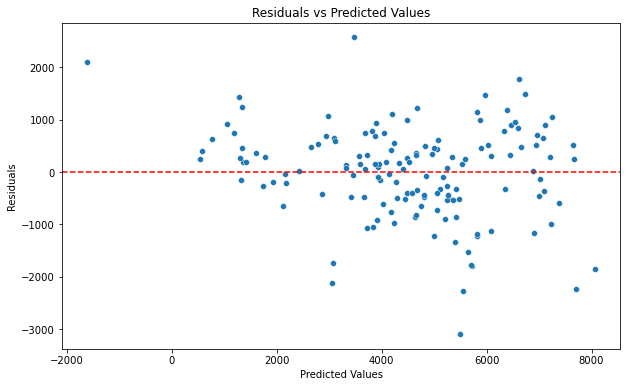

In [65]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

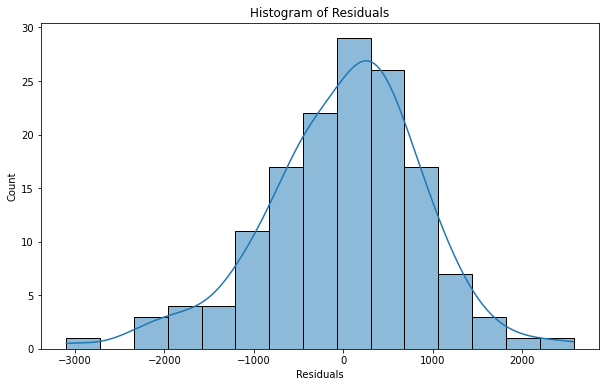

In [66]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

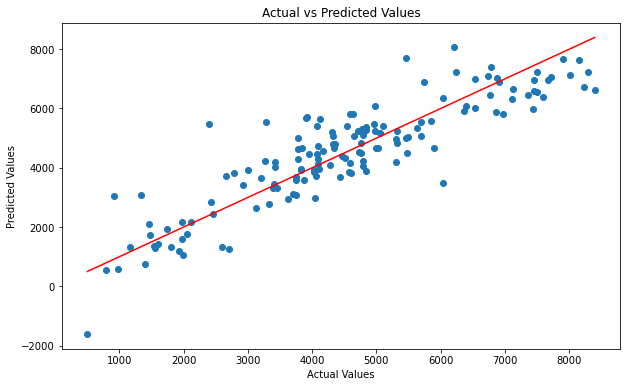

In [67]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

**Model Two**

In [68]:
estimator=LinearRegression()
selector2=RFE(estimator,n_features_to_select=20)

In [69]:
selector2=selector2.fit(X_train_df,y_train)
selector2.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False])

In [70]:
selected_features2=X_train_df.columns[selector2.support_]
print(selected_features2)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cloudy',
       'lightrain', 'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul',
       'Nov', 'Sep', 'Mon', 'Sat', 'Sun'],
      dtype='object')


In [71]:
X_train2=X_train_df[selected_features2]
X_test2=X_test_df[selected_features2]

In [72]:
import statsmodels.api as sm
X_train_sm2=sm.add_constant(X_train2)#X_train_sm["const"]=1
X_test_sm2=sm.add_constant(X_test2)

In [73]:
model2=sm.OLS(np.array(y_train),X_train_sm2)
lr1=model2.fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     163.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          5.66e-219
Time:                        22:43:43   Log-Likelihood:                -4695.5
No. Observations:                 584   AIC:                             9433.
Df Residuals:                     563   BIC:                             9525.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3249.2652    673.892      4.822      0.000    1925.615    4572.916
yr          1978.5644     64.675     30.593      0.000    1851.531    2105.598
holiday    -1141.6449    558.453     -2.044      0.041   -2238.551     -44.739
workingday  -374.4918    595.883     -0.628      0.530   -1544.917     795.933
temp        4044.8302    305.688     13.232      0.000    3444.402    4645.259
hum        -1308.4037    308.897     -4.236      0.000   -1915.135    -701.672
windspeed  -1578.1891    206.822     -7.631      0.000   -1984.427   -1171.952
cloudy      -500.5397     84.710     -5.909      0.000    -666.926    -334.154
lightrain  -2212.1148    217.795    -10.157      0.000   -2639.906   -1784.324
spring      -533.3943    177.118     -3.012      0.003    -881.286    -185.502
summer       325.7131    122.641      2.656      0.008      84.823     566.603
winter       942.9222    139.532      6.758      0.000     668.856    1216.989
Dec         -494.4469    144.642     -3.418      0.001    -778.550    -210.344
Feb         -290.2059    168.750     -1.720      0.086    -621.663      41.251
Jan         -526.2723    172.002     -3.060      0.002    -864.116    -188.429
Jul         -462.8361    147.658     -3.135      0.002    -752.863    -172.809
Nov         -505.5718    154.027     -3.282      0.001    -808.109    -203.034
Sep          555.6961    134.370      4.136      0.000     291.768     819.624
Mon         -184.2526     90.999     -2.025      0.043    -362.993      -5.513
Sat         -258.5805    594.398     -0.435      0.664   -1426.089     908.927
Sun         -197.4509    593.257     -0.333      0.739   -1362.719     967.817
==============================================================================
Omnibus:                       96.883   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.020
Skew:                          -0.843   Prob(JB):                     8.43e-55
Kurtosis:                       5.719   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,453.356944
1,yr,1.043140
2,holiday,8.296117
3,workingday,70.508435
4,temp,4.728599
5,hum,1.977812
6,windspeed,1.204811
7,cloudy,1.613108
8,lightrain,1.261826
9,spring,5.898690


In [75]:
#Dropping Sunday
X_train_sm2=X_train_sm2.drop(["Sun"],axis=1)
X_test_sm2=X_test_sm2.drop(["Sun"],axis=1)


In [76]:
model_new=sm.OLS(np.array(y_train),X_train_sm2)
lr2=model_new.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.50e-220
Time:                        22:43:43   Log-Likelihood:                -4695.6
No. Observations:                 584   AIC:                             9431.
Df Residuals:                     564   BIC:                             9519.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3049.7694    307.732      9.910      0.000    2445.328    3654.211
yr          1980.1010     64.459     30.719      0.000    1853.492    2106.710
holiday     -969.6515    211.541     -4.584      0.000   -1385.156    -554.147
workingday  -178.8913     98.350     -1.819      0.069    -372.068      14.285
temp        4046.5061    305.406     13.250      0.000    3446.635    4646.377
hum        -1304.7228    308.455     -4.230      0.000   -1910.585    -698.861
windspeed  -1579.9823    206.589     -7.648      0.000   -1985.760   -1174.205
cloudy      -500.4619     84.643     -5.913      0.000    -666.716    -334.208
lightrain  -2211.5902    217.618    -10.163      0.000   -2639.031   -1784.150
spring      -531.7544    176.909     -3.006      0.003    -879.236    -184.273
summer       326.1822    122.536      2.662      0.008      85.499     566.865
winter       942.8444    139.422      6.763      0.000     668.995    1216.693
Dec         -493.6233    144.506     -3.416      0.001    -777.460    -209.787
Feb         -289.6779    168.610     -1.718      0.086    -620.858      41.502
Jan         -525.3996    171.846     -3.057      0.002    -862.936    -187.863
Jul         -462.6209    147.540     -3.136      0.002    -752.416    -172.826
Nov         -510.9895    153.044     -3.339      0.001    -811.594    -210.385
Sep          556.3500    134.250      4.144      0.000     292.659     820.041
Mon         -184.0504     90.926     -2.024      0.043    -362.645      -5.456
Sat          -65.2983    126.623     -0.516      0.606    -314.008     183.411
==============================================================================
Omnibus:                       96.962   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.902
Skew:                          -0.846   Prob(JB):                     1.47e-54
Kurtosis:                       5.707   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,94.687131
1,yr,1.037824
2,holiday,1.192275
3,workingday,1.923756
4,temp,4.727316
5,hum,1.975277
6,windspeed,1.203993
7,cloudy,1.613096
8,lightrain,1.261760
9,spring,5.894125


In [78]:
#Dropping Sat 

X_train_sm2=X_train_sm2.drop(["Sat"],axis=1)
X_test_sm2=X_test_sm2.drop(["Sat"],axis=1)

In [79]:
model_new1=sm.OLS(np.array(y_train),X_train_sm2)
lr3=model_new1.fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.75e-221
Time:                        22:43:43   Log-Likelihood:                -4695.7
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     565   BIC:                             9512.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3019.2087    301.776     10.005      0.000    2426.469    3611.949
yr          1980.5142     64.412     30.748      0.000    1853.998    2107.030
holiday     -941.8502    204.423     -4.607      0.000   -1343.373    -540.328
workingday  -147.3495     76.967     -1.914      0.056    -298.526       3.827
temp        4043.4193    305.149     13.251      0.000    3444.055    4642.783
hum        -1304.4482    308.255     -4.232      0.000   -1909.913    -698.983
windspeed  -1576.7898    206.362     -7.641      0.000   -1982.120   -1171.459
cloudy      -499.8633     84.580     -5.910      0.000    -665.993    -333.734
lightrain  -2216.3980    217.277    -10.201      0.000   -2643.167   -1789.629
spring      -533.8892    176.746     -3.021      0.003    -881.049    -186.730
summer       325.1577    122.440      2.656      0.008      84.664     565.652
winter       942.2401    139.326      6.763      0.000     668.580    1215.901
Dec         -492.0301    144.380     -3.408      0.001    -775.616    -208.444
Feb         -287.8318    168.462     -1.709      0.088    -618.720      43.057
Jan         -525.3360    171.735     -3.059      0.002    -862.652    -188.020
Jul         -460.1653    147.367     -3.123      0.002    -749.620    -170.711
Nov         -515.5551    152.688     -3.377      0.001    -815.461    -215.650
Sep          557.6444    134.139      4.157      0.000     294.172     821.117
Mon         -184.1418     90.866     -2.027      0.043    -362.619      -5.665
==============================================================================
Omnibus:                       95.572   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.955
Skew:                          -0.835   Prob(JB):                     1.06e-53
Kurtosis:                       5.691   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,91.175661
1,yr,1.037664
2,holiday,1.114840
3,workingday,1.179715
4,temp,4.725500
5,hum,1.975271
6,windspeed,1.202912
7,cloudy,1.612793
8,lightrain,1.259444
9,spring,5.890897


In [81]:
#Removing Working DAY

X_train_sm2=X_train_sm2.drop(["workingday"],axis=1)
X_test_sm2=X_test_sm2.drop(["workingday"],axis=1)

In [82]:
model_new2=sm.OLS(np.array(y_train),X_train_sm2)
lr4=model_new2.fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.65e-221
Time:                        22:43:43   Log-Likelihood:                -4697.6
No. Observations:                 584   AIC:                             9431.
Df Residuals:                     566   BIC:                             9510.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2940.1714    299.642      9.812      0.000    2351.626    3528.717
yr          1978.8129     64.557     30.652      0.000    1852.012    2105.614
holiday     -838.6261    197.648     -4.243      0.000   -1226.840    -450.413
temp        4048.2183    305.856     13.236      0.000    3447.467    4648.969
hum        -1346.9725    308.176     -4.371      0.000   -1952.281    -741.664
windspeed  -1576.4596    206.847     -7.621      0.000   -1982.741   -1170.178
cloudy      -485.7928     84.458     -5.752      0.000    -651.682    -319.903
lightrain  -2201.4949    217.648    -10.115      0.000   -2628.991   -1773.998
spring      -532.9486    177.161     -3.008      0.003    -880.922    -184.975
summer       317.9614    122.671      2.592      0.010      77.016     558.906
winter       932.8172    139.567      6.684      0.000     658.685    1206.949
Dec         -479.2933    144.565     -3.315      0.001    -763.243    -195.343
Feb         -302.3419    168.687     -1.792      0.074    -633.671      28.988
Jan         -530.5066    172.117     -3.082      0.002    -868.573    -192.440
Jul         -454.0198    147.679     -3.074      0.002    -744.085    -163.955
Nov         -516.3779    153.046     -3.374      0.001    -816.986    -215.770
Sep          566.1099    134.382      4.213      0.000     302.163     830.057
Mon         -228.8449     88.021     -2.600      0.010    -401.733     -55.956
==============================================================================
Omnibus:                       89.147   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.947
Skew:                          -0.772   Prob(JB):                     1.58e-51
Kurtosis:                       5.689   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,89.469250
1,yr,1.037466
2,holiday,1.037282
3,temp,4.725181
4,hum,1.965014
5,windspeed,1.202911
6,cloudy,1.600615
7,lightrain,1.257827
8,spring,5.890852
9,summer,2.785728


In [84]:

X_train_sm2=X_train_sm2.drop(["Feb"],axis=1)
X_test_sm2=X_test_sm2.drop(["Feb"],axis=1)

In [85]:
model_new3=sm.OLS(np.array(y_train),X_train_sm2)
lr5=model_new3.fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          5.61e-222
Time:                        22:43:43   Log-Likelihood:                -4699.3
No. Observations:                 584   AIC:                             9433.
Df Residuals:                     567   BIC:                             9507.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2847.9558    295.767      9.629      0.000    2267.023    3428.888
yr          1974.6080     64.640     30.548      0.000    1847.644    2101.572
holiday     -849.8414    197.934     -4.294      0.000   -1238.615    -461.068
temp        4181.1890    297.300     14.064      0.000    3597.245    4765.133
hum        -1370.2145    308.503     -4.441      0.000   -1976.164    -764.265
windspeed  -1571.3920    207.231     -7.583      0.000   -1978.426   -1164.358
cloudy      -483.9368     84.616     -5.719      0.000    -650.137    -317.737
lightrain  -2181.8584    217.796    -10.018      0.000   -2609.643   -1754.073
spring      -625.0969    169.867     -3.680      0.000    -958.743    -291.451
summer       344.8552    121.987      2.827      0.005     105.254     584.456
winter       944.3781    139.689      6.761      0.000     670.007    1218.750
Dec         -390.9278    136.164     -2.871      0.004    -658.374    -123.481
Jan         -360.3634    143.851     -2.505      0.013    -642.910     -77.817
Jul         -462.2004    147.896     -3.125      0.002    -752.691    -171.710
Nov         -473.1755    151.431     -3.125      0.002    -770.610    -175.741
Sep          579.0034    134.450      4.306      0.000     314.922     843.085
Mon         -225.8662     88.177     -2.562      0.011    -399.060     -52.672
==============================================================================
Omnibus:                       83.301   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.517
Skew:                          -0.725   Prob(JB):                     5.85e-48
Kurtosis:                       5.615   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,86.831421
1,yr,1.036096
2,holiday,1.036243
3,temp,4.447168
4,hum,1.961535
5,windspeed,1.202686
6,cloudy,1.600374
7,lightrain,1.254640
8,spring,5.394733
9,summer,2.744048


In [87]:
X_train_sm2=X_train_sm2.drop(["spring"],axis=1)
X_test_sm2=X_test_sm2.drop(["spring"],axis=1)

In [88]:
model_new4=sm.OLS(np.array(y_train),X_train_sm2)
lr6=model_new4.fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.97e-220
Time:                        22:43:43   Log-Likelihood:                -4706.2
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     568   BIC:                             9514.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2172.4202    234.449      9.266      0.000    1711.928    2632.913
yr          1958.5422     65.201     30.039      0.000    1830.478    2086.607
holiday     -888.3168    199.828     -4.445      0.000   -1280.809    -495.825
temp        4938.9390    216.799     22.781      0.000    4513.114    5364.764
hum        -1470.4429    310.673     -4.733      0.000   -2080.651    -860.235
windspeed  -1639.2263    208.676     -7.855      0.000   -2049.097   -1229.356
cloudy      -459.9448     85.291     -5.393      0.000    -627.469    -292.420
lightrain  -2125.9247    219.650     -9.679      0.000   -2557.351   -1694.499
summer       653.1344     89.646      7.286      0.000     477.057     829.212
winter      1297.5416    102.617     12.645      0.000    1095.987    1499.096
Dec         -329.7359    136.628     -2.413      0.016    -598.094     -61.378
Jan         -387.0995    145.245     -2.665      0.008    -672.383    -101.816
Jul         -356.3597    146.665     -2.430      0.015    -644.432     -68.288
Nov         -360.4138    149.927     -2.404      0.017    -654.892     -65.936
Sep          723.5255    129.999      5.566      0.000     468.189     978.862
Mon         -217.5366     89.116     -2.441      0.015    -392.574     -42.499
==============================================================================
Omnibus:                       71.478   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.592
Skew:                          -0.680   Prob(JB):                     6.02e-35
Kurtosis:                       5.151   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,53.381222
1,yr,1.031370
2,holiday,1.033351
3,temp,2.313778
4,hum,1.946246
5,windspeed,1.193170
6,cloudy,1.590873
7,lightrain,1.248529
8,summer,1.449911
9,winter,1.917480


**Prediction For the second Model**

In [90]:
# Predict on the test set
y_test_pred2 = lr6.predict(X_test_sm2)

In [91]:
y_test_pred2

184    3471.256987
535    8086.669721
299    3758.947296
221    5327.355343
152    5518.781263
          ...     
219    5091.143041
719    2973.994021
3      1341.782035
392    3688.935618
360    1348.531055
Length: 146, dtype: float64

In [92]:
# Calculate residuals
residuals_new = y_test - y_test_pred2

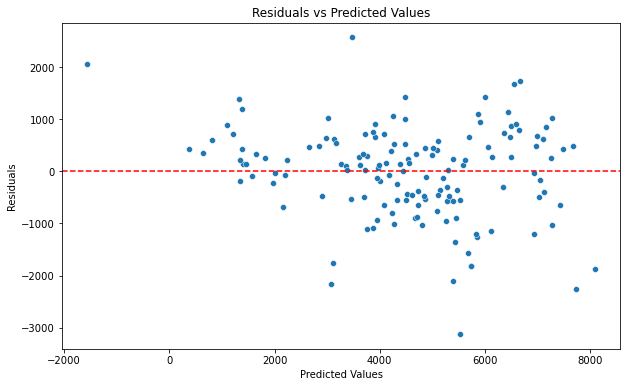

In [93]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred2, y=residuals_new)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

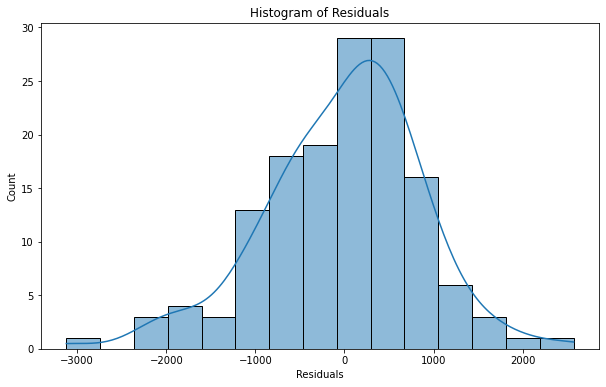

In [94]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_new, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

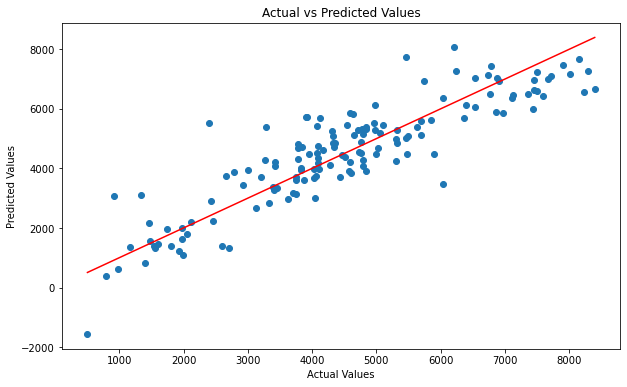

In [95]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Test on Train Data

In [101]:
y_train_pred = res2.predict(X_train_sm)

In [102]:
# Calculate residuals for the training set
residuals_train = y_train - y_train_pred

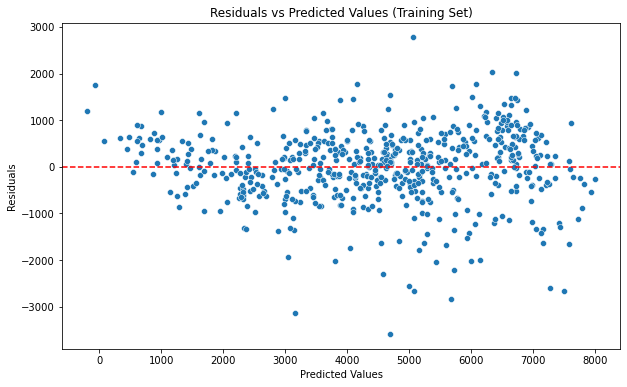

In [103]:
# Plot residuals for the training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

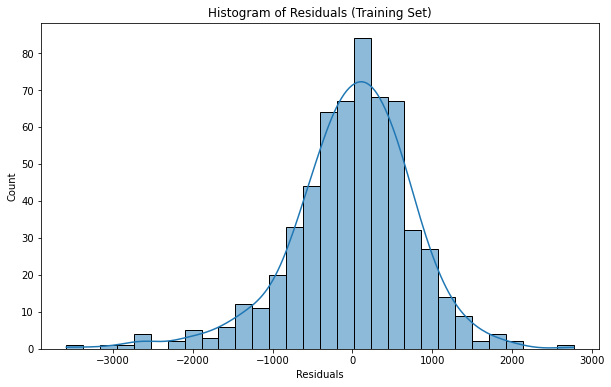

In [104]:
# Plot histogram of residuals for the training set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Training Set)')
plt.show()

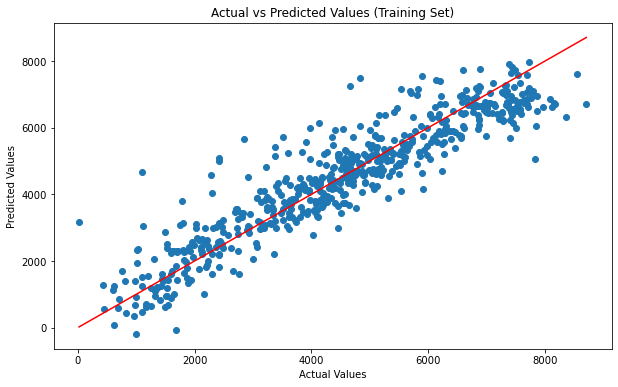

In [105]:
# Plot actual vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()